# Building a Neural Network from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Prepare the data for XOR operations.

In [2]:
X = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ])
y = np.array([ [1], [1], [0], [0]])

Defining the number of nodes in each layer.

In [3]:
num_input = 2
num_hidden = 5
num_output = 1

Initializing the weights and bias randomly. First, we initialize the input to
hidden layer weights.

In [4]:
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

Why = np.random.randn (num_hidden,num_output)
by = np.zeros((1,num_output))

Define the sigmoid activation function.

In [5]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

Define the derivative of the sigmoid function.

In [6]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

Define the forward propagation

In [7]:
def forward_prop(X,Wxh,Why):
    z1 = np.dot(X,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)
    return z1,a1,z2,y_hat

Define the backward propagation

In [8]:
def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)
    return dJ_dWxh, dJ_dWhy

Define the cost function

In [9]:
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J

Set the learning rate and the number of training iterations

In [10]:
alpha = 0.01
num_iterations = 5000

Now, lets start training the network with the following code

In [11]:
cost =[]
for i in range(num_iterations):
    z1,a1,z2,y_hat = forward_prop(X,Wxh,Why)
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
    #update weights
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy
    #compute cost
    c = cost_function(y, y_hat)
    cost.append(c)

Plot the cost function

Text(0, 0.5, 'Cost')

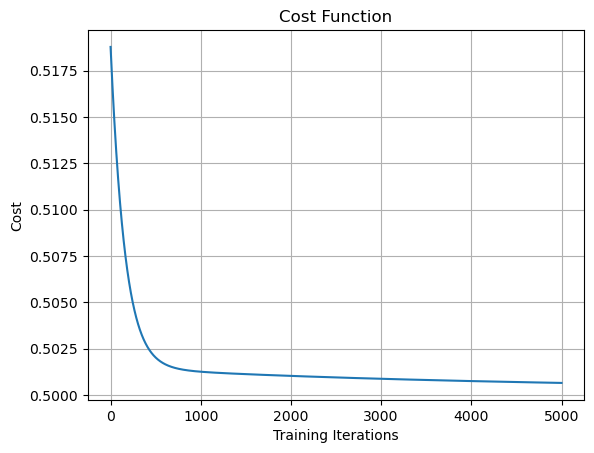

In [12]:
plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

As you can observe in the following plot, the loss decreases over the training
iterations